In [1]:
# Library yang saya perlukan nantinya
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time

### Read the data and check its specification

In [2]:
# Baca data dan cek spesifikasinya
df = pd.read_csv('Quiz3_Dataset.csv',parse_dates=['Tanggal'])

In [3]:
df

,Tanggal,Musim,Tahun,Bulan,holiday,weekday,weather,temp,humidity,windspeed,registered,count
0,2020-01-01,1,2020,Januari,hari biasa,Wednesday,berkabut,0.344167,0.805833,0.160446,654,985
1,2020-01-02,1,2020,Januari,hari biasa,Thursday,berkabut,0.363478,0.696087,0.248539,670,801
2,2020-01-03,1,2020,Januari,hari biasa,Friday,cerah berawan,0.196364,0.437273,0.248309,1229,1349
3,2020-01-04,1,2020,Januari,hari biasa,Saturday,cerah berawan,0.200000,0.590435,0.160296,1454,1562
4,2020-01-05,1,2020,Januari,hari biasa,Sunday,cerah berawan,0.226957,0.436957,0.186900,1518,1600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     731 non-null    datetime64[ns]
 1   Musim       731 non-null    int64         
 2   Tahun       731 non-null    int64         
 3   Bulan       731 non-null    object        
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   weather     731 non-null    object        
 7   temp        731 non-null    float64       
 8   humidity    731 non-null    float64       
 9   windspeed   731 non-null    float64       
 10  registered  731 non-null    int64         
 11  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 68.7+ KB


In [45]:
df.nunique()

Tanggal       731
Musim           4
Tahun           2
Bulan          12
holiday         2
weekday         7
weather         3
temp          499
humidity      595
windspeed     650
registered    679
count         696
dtype: int64

### Summary of the data

In [120]:
# Summary of the data
df_str = df
df_str[['Musim','Tahun']] = df_str[['Musim','Tahun']].apply(lambda x: x.astype('str'))
df_str.describe(include='all').drop('Tanggal',axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_15828\4226892497.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_str.describe(include='all').drop('Tanggal',axis=1)


,Musim,Tahun,Bulan,holiday,weekday,weather,temp,humidity,windspeed,registered,count
count,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000
unique,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN
top,3,2021,Januari,hari biasa,Wednesday,cerah berawan,NaN,NaN,NaN,NaN,NaN
freq,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.627894,0.190486,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.142429,0.077498,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.000000,0.022392,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.520000,0.134950,2497.000000,3152.000000


In [15]:
df.notnull().sum()

Tanggal       731
Musim         731
Tahun         731
Bulan         731
holiday       731
weekday       731
weather       731
temp          731
humidity      731
windspeed     731
registered    731
count         731
dtype: int64

**it turns out that there isn't the null data**

#### Hubungan antara pengguna terdaftar yang menyewa sepeda terhadap total penyewaan sepeda pada hari tertentu :

Text(0.5, 1.0, 'Hubungan antara pengguna terdaftar yang menyewa sepeda terhadap total penyewaan sepeda pada hari tertentu  ')

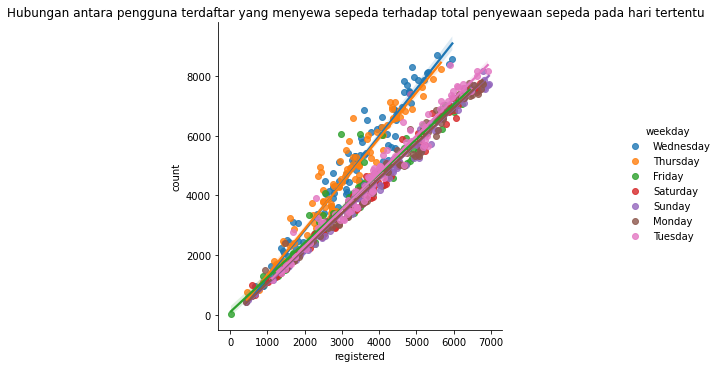

In [48]:
#Hubungan antara pengguna terdaftar yang menyewa sepeda terhadap total penyewaan sepeda pada hari tertentu 
sns.lmplot(data=df,x='registered',y='count',hue='weekday')
plt.title("Hubungan antara pengguna terdaftar yang menyewa sepeda terhadap total penyewaan sepeda pada hari tertentu  ")

#### Hubungan antara suhu dan jumlah sepeda yang disewa :

Text(0.5, 1.0, 'Hubungan antara suhu dan jumlah sepeda yang disewa')

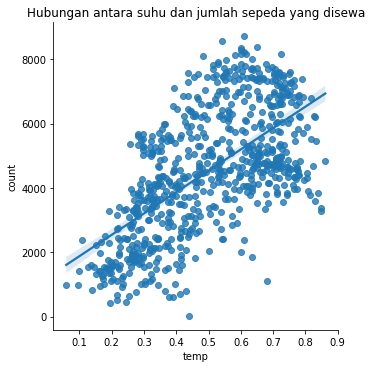

In [49]:
#Hubungan antara suhu dan jumlah sepeda yang disewa
sns.lmplot(data=df,x='temp',y='count')
plt.title('Hubungan antara suhu dan jumlah sepeda yang disewa')

#### Hubungan antara suhu dan jumlah sepeda yang disewa dalam dua tahun :

Text(0.5, 1.0, 'Hubungan antara suhu dan jumlah sepeda yang disewa dalam dua tahun')

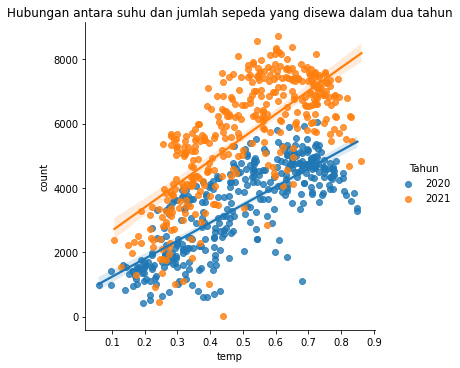

In [50]:
#Hubungan antara suhu dan jumlah sepeda yang disewa dalam dua tahun
sns.lmplot(data=df,x='temp',y='count',hue='Tahun')
plt.title('Hubungan antara suhu dan jumlah sepeda yang disewa dalam dua tahun')

#### Hubungan antara kelembaban dan jumlah sepeda yang disewa :

Text(0.5, 1.0, 'Hubungan antara kelembaban dan jumlah sepeda yang disewa')

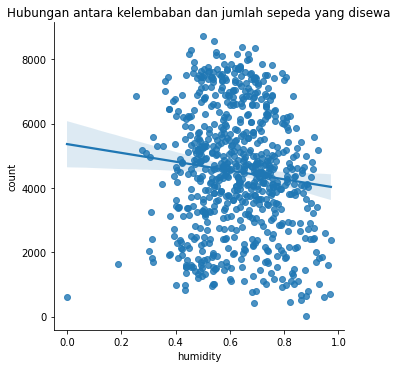

In [51]:
#Hubungan antara kelembaban dan jumlah sepeda yang disewa
sns.lmplot(data=df,x='humidity',y='count')
plt.title('Hubungan antara kelembaban dan jumlah sepeda yang disewa')

#### Hubungan antara kelembaban dan jumlah sepeda yang disewa jika cuaca berbeda :

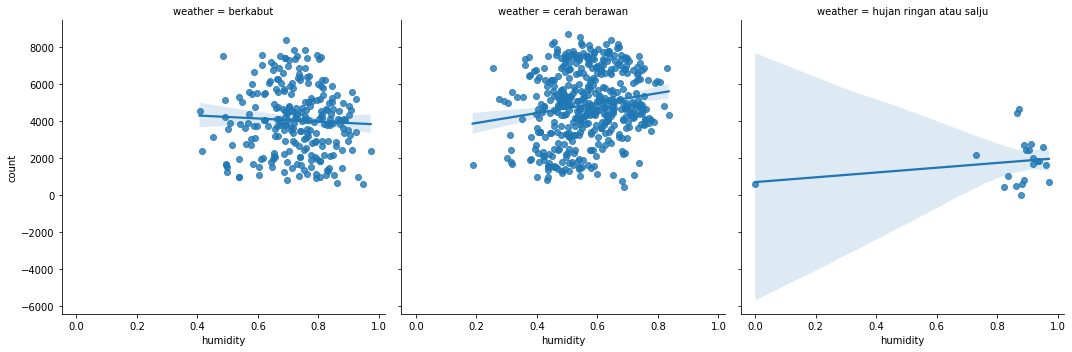

In [54]:
### Hubungan antara kelembaban dan jumlah sepeda yang disewa jika cuaca berbeda
sns.lmplot(data=df,x='humidity',y='count',col='weather')
#plt.legend(bbox_to_anchor =(1.5,0.6))

#### Hubungan antara jenis musim dengan jumlah sepeda yang disewa:

Text(0.5, 1.0, 'Hubungan antara jenis musim dengan jumlah sepeda yang disewa')

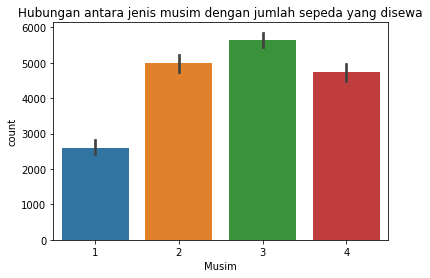

In [55]:
# Hubungan antara jenis musim dengan jumlah sepeda yang disewa
musim = {'Musim':{1:'Dingin',2:'Semi',3:'Panas',4:'Gugur'}}
df_2= df.replace(musim)
sns.barplot(data=df_2,x='Musim',y='count')
plt.title('Hubungan antara jenis musim dengan jumlah sepeda yang disewa')

#### Hubungan antara Kecepatan Angin dengan jumlah sepeda yang disewa:

<Figure size 1200x500 with 0 Axes>

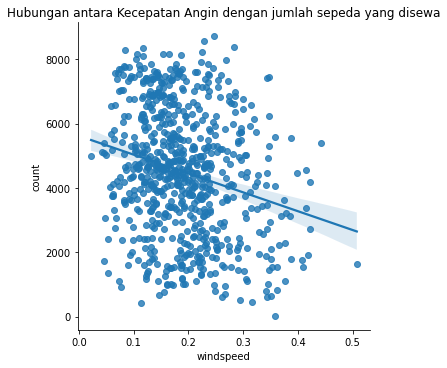

<Figure size 1200x500 with 0 Axes>

In [56]:
#Hubungan antara Kecepatan Angin dengan jumlah sepeda yang disewa
sns.lmplot(data=df,x='windspeed',y='count',)
plt.title('Hubungan antara Kecepatan Angin dengan jumlah sepeda yang disewa')
plt.figure(figsize=(12,5),dpi=100)

#### Jumlah Sepeda yang disewa per Bulan:

Text(0.5, 1.0, 'Jumlah Sepeda yang disewa per Bulan')

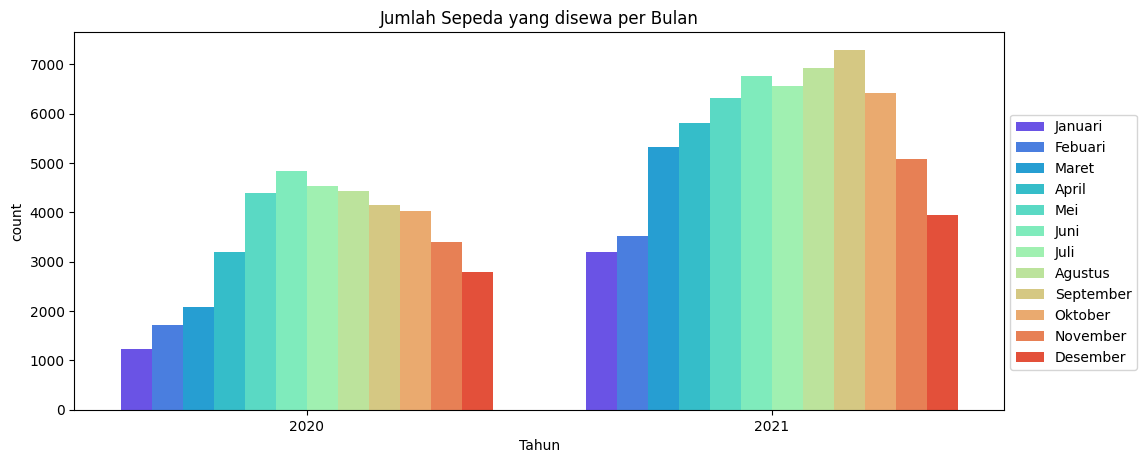

In [57]:
#Jumlah Sepeda yang disewa per Bulan
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(x='Tahun',y='count',hue='Bulan',palette='rainbow',data=df,ci=None)
plt.legend(bbox_to_anchor =(1.15,0.8))
plt.title('Jumlah Sepeda yang disewa per Bulan')

#### Jumlah Sepeda yang disewa per Musim :

Text(0.5, 1.0, 'Jumlah Sepeda yang disewa per Musim')

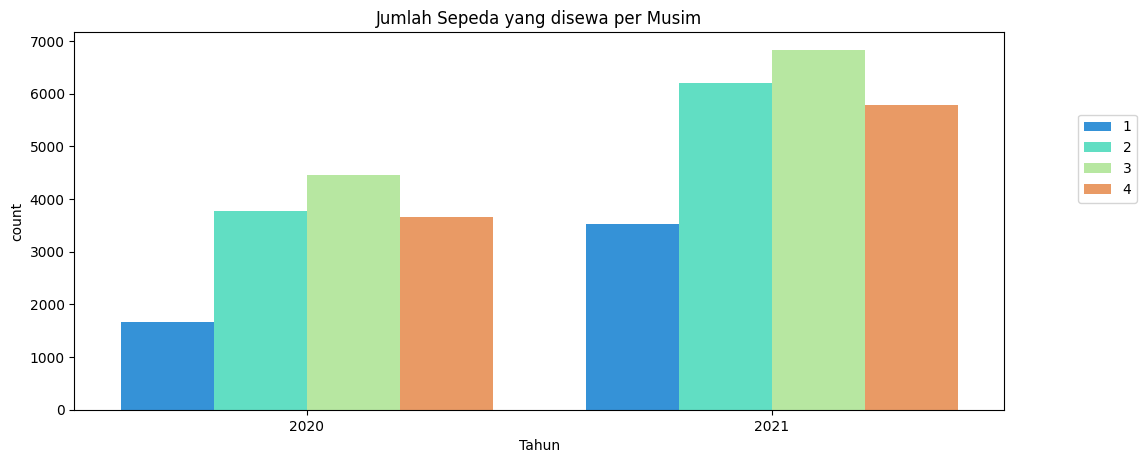

In [58]:
#Jumlah Sepeda yang disewa per Musim
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(x='Tahun',y='count',hue='Musim',palette='rainbow',data=df,ci=None)
plt.legend(bbox_to_anchor =(1.15,0.8))
plt.title('Jumlah Sepeda yang disewa per Musim')

### Persebaran data 

Text(0.5, 1.0, 'Histogram untuk Temperatur  Terhadap Count')

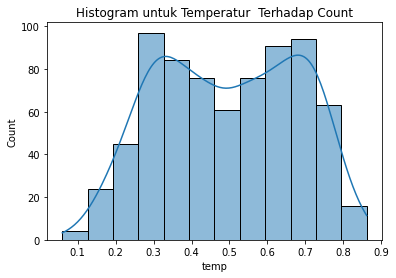

In [59]:
#Persebaran Data
#Histogram untuk Temperatur  Terhadap Count
sns.histplot(data=df, x="temp", kde=True)
plt.title('Histogram untuk Temperatur  Terhadap Count')

Text(0.5, 1.0, 'Boxplot untuk temperatur')

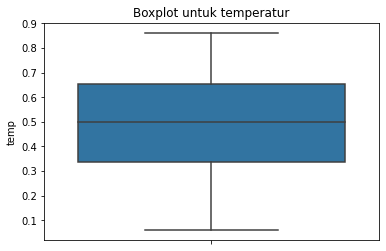

In [60]:
#Boxplot untuk temperatur
sns.boxplot(data=df, y="temp")
plt.title('Boxplot untuk temperatur')

Text(0.5, 1.0, 'Histogram untuk Humidity  Terhadap Count')

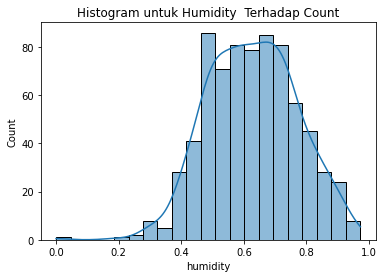

In [61]:
#Histogram untuk Humidity  Terhadap Count
sns.histplot(data=df, x="humidity", kde=True)
plt.title('Histogram untuk Humidity  Terhadap Count')

Text(0.5, 1.0, 'Boxplot untuk Humidity')

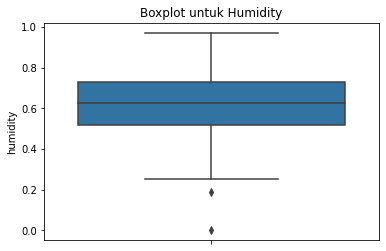

In [28]:
sns.boxplot(data=df, y="humidity")
plt.title('Boxplot untuk Humidity')

Text(0.5, 1.0, 'Histogram untuk Windspeed  Terhadap Count')

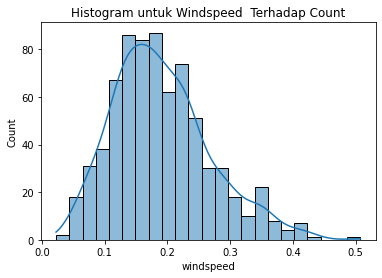

In [62]:
#Histogram untuk Windspeed  Terhadap Count
sns.histplot(data=df, x="windspeed", kde=True)
plt.title('Histogram untuk Windspeed  Terhadap Count')

Text(0.5, 1.0, 'Boxplot untuk Windspeed')

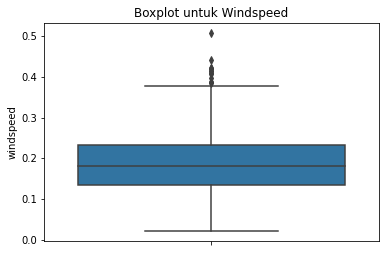

In [63]:
#Boxplot untuk Windspeed
sns.boxplot(data=df, y="windspeed")
plt.title('Boxplot untuk Windspeed')

<AxesSubplot:xlabel='Tanggal', ylabel='count'>

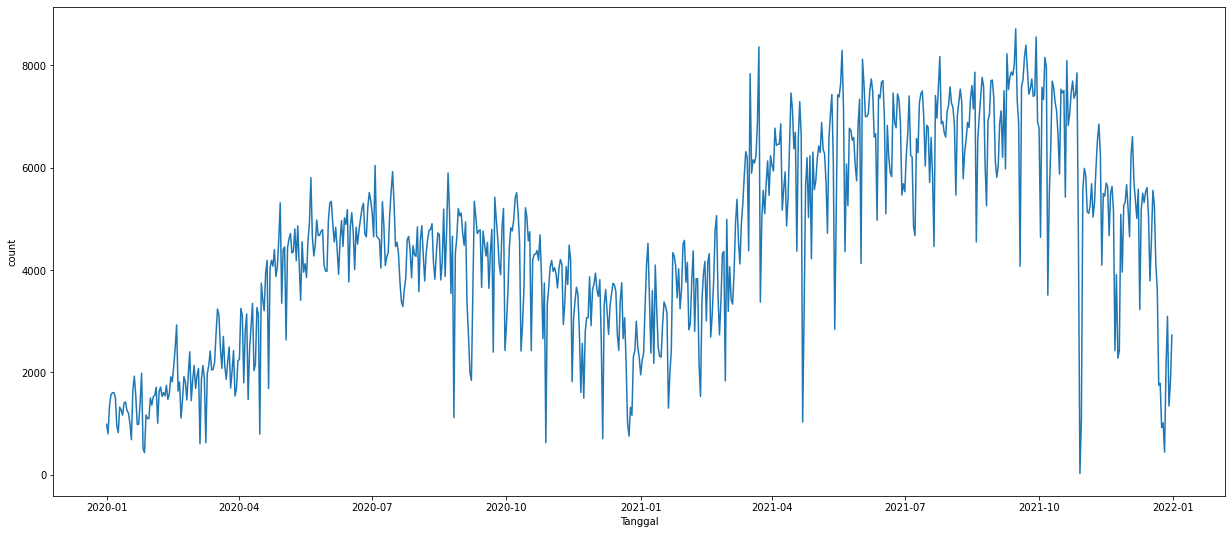

In [26]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df,x = df['Tanggal'], y = df['count'])

In [64]:
#Membersihkan Data Pencilannya :
var_outlier = ['humidity', 'windspeed']
for var in var_outlier:
 q1 = np.quantile(df[var], 0.25)
 q3 = np.quantile(df[var], 0.75)
 iqr = q3-q1
 upper_bound = q3+(1.5*iqr)
 lower_bound = q1-(1.5*iqr)
 df_clean = df[(df[var] > lower_bound) & (df[var] < upper_bound)]

Text(0.5, 1.0, 'Boxplot untuk Windspeed')

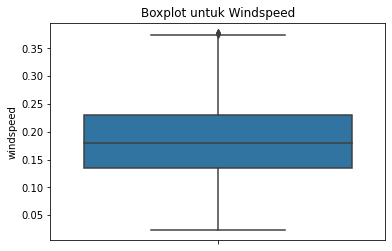

In [67]:
#Boxplot untuk Windspeed setelah cleaning
sns.boxplot(data=df_clean, y="windspeed")
plt.title('Boxplot untuk Windspeed')

### Mengubah feature-feature kategorical dari string menjadi ordinal

In [111]:
# Mengubah feature-feature kategorical dari string menjadi ordinal
X = df_clean.copy()
y = X.pop("count")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
X = X.drop(['Tanggal','registered'],axis=1)
X

,Musim,Tahun,Bulan,holiday,weekday,weather,temp,humidity,windspeed
0,0,0,0,0,0,0,0.344167,0.805833,0.160446
1,0,0,0,0,1,0,0.363478,0.696087,0.248539
2,0,0,0,0,2,1,0.196364,0.437273,0.248309
3,0,0,0,0,3,1,0.200000,0.590435,0.160296
4,0,0,0,0,4,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
726,0,1,11,0,5,0,0.254167,0.652917,0.350133
727,0,1,11,0,6,0,0.253333,0.590000,0.155471
728,0,1,11,0,0,0,0.253333,0.752917,0.124383
729,0,1,11,0,1,1,0.255833,0.483333,0.350754


### Melihat seberapa signifikan suatu feature terhadap target

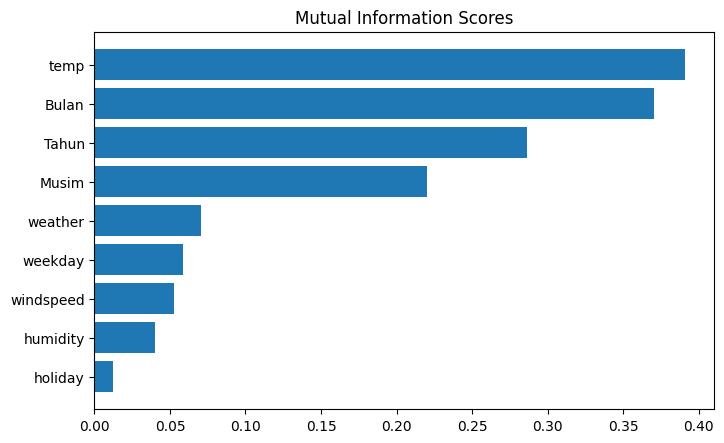

In [71]:
# Melihat seberapa signifikan suatu feature terhadap target dengan menggunakan mutual information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores) # show a few features with their MI scores

Text(0.5, 1.0, 'Korelasi antar Variabel')

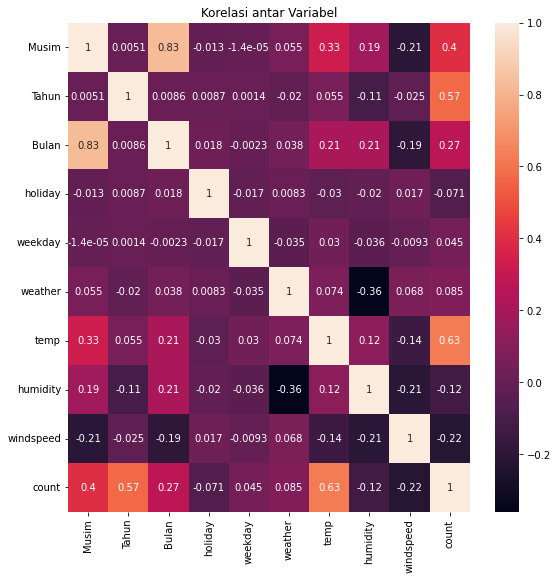

In [76]:
# Melihat seberapa signifikan suatu feature terhadap target dengan menggunakan heatmap correlation
df_ordinal = pd.concat([X,y],axis=1)
plt.figure(figsize=(9,9))
sns.heatmap(df_ordinal.corr(), annot=True)
plt.title('Korelasi antar Variabel')

### Pemodelan jika menggunakan kategorical yang diubah menjadi ordinal

In [112]:
#Pemodelan jika menggunakan kategorical yang diubah menjadi ordinal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
lingress_model = LinearRegression()
lingress_model.fit(X_train,y_train)

LinearRegression()

In [113]:
#Evaluasi pemodelan jika menggunakan kategorical yang diubah menjadi ordinal
from sklearn.metrics import mean_squared_error,r2_score
test_prediction = lingress_model.predict(X_test)
MSE_ordinal = mean_squared_error(y_test,test_prediction)
RMSE_ordinal = np.sqrt(MSE_ordinal)
rsquared_score_ordinal = r2_score(y_test, test_prediction)
print('RMSE_Ordinal = ',RMSE_ordinal)
print('R^2_Ordinal = ',rsquared_score_ordinal)

RMSE_Ordinal =  926.6365052307975
R^2_Ordinal =  0.7483841334647081


In [79]:
#Inferensi dari model jika menggunakan kategorical yang diubah menjadi ordinal
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     275.2
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          2.03e-224
Time:                        12:34:44   Log-Likelihood:                -5913.2
No. Observations:                 718   AIC:                         1.185e+04
Df Residuals:                     708   BIC:                         1.189e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2563.9895    256.911      9.980      0.0

### Pemodelan jika menggunakan kategorical yang diubah menjadi ONE-HOT numeric

In [107]:
# Pemodelan jika menggunakan kategorical yang diubah menjadi ONE-HOT numeric
from sklearn.preprocessing import OneHotEncoder
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Tahun','Bulan','holiday','weekday','weather','Musim'])
df_onehot = df_onehot.drop(['Tahun_2020','Bulan_Januari','holiday_hari biasa','weekday_Monday','weather_berkabut','Musim_1'],axis=1)
df_onehot

,Tanggal,temp,humidity,windspeed,registered,count,Tahun_2021,Bulan_Agustus,Bulan_April,Bulan_Desember,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_cerah berawan,weather_hujan ringan atau salju,Musim_2,Musim_3,Musim_4
0,2020-01-01,0.344167,0.805833,0.160446,654,985,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2020-01-02,0.363478,0.696087,0.248539,670,801,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2020-01-03,0.196364,0.437273,0.248309,1229,1349,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2020-01-04,0.200000,0.590435,0.160296,1454,1562,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2020-01-05,0.226957,0.436957,0.186900,1518,1600,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,0.254167,0.652917,0.350133,1867,2114,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
727,2021-12-28,0.253333,0.590000,0.155471,2451,3095,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
728,2021-12-29,0.253333,0.752917,0.124383,1182,1341,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
729,2021-12-30,0.255833,0.483333,0.350754,1432,1796,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [108]:
X = df_onehot.copy()
y = X.pop("count")
X = X.drop(['Tanggal','registered'],axis=1)
X

,temp,humidity,windspeed,Tahun_2021,Bulan_Agustus,Bulan_April,Bulan_Desember,Bulan_Febuari,Bulan_Juli,Bulan_Juni,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_cerah berawan,weather_hujan ringan atau salju,Musim_2,Musim_3,Musim_4
0,0.344167,0.805833,0.160446,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.363478,0.696087,0.248539,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.196364,0.437273,0.248309,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.200000,0.590435,0.160296,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0.226957,0.436957,0.186900,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,0.253333,0.590000,0.155471,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,0.253333,0.752917,0.124383,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
729,0.255833,0.483333,0.350754,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [109]:
#Evaluasi pemodelan jika menggunakan kategorical yang diubah menjadi ONE_HOT numeric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
lingress_model = LinearRegression()
lingress_model.fit(X_train,y_train)

LinearRegression()

In [110]:
#Evaluasi pemodelan jika menggunakan kategorical yang diubah menjadi ONE-Hot numeric
from sklearn.metrics import mean_squared_error,r2_score
test_prediction = lingress_model.predict(X_test)
MSE_Onehot = mean_squared_error(y_test,test_prediction)
RMSE_Onehot = np.sqrt(MSE_Onehot)
rsquared_score_Onehot = r2_score(y_test, test_prediction)
print('RMSE_OneHot = ',RMSE_Onehot)
print('R^2_OneHot = ',rsquared_score_Onehot)

RMSE_OneHot =  773.2093834685986
R^2_OneHot =  0.8370084885149923


In [44]:
# Inferensi untuk transformasi One-Hot
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          2.58e-266
Time:                        12:02:41   Log-Likelihood:                -5881.6
No. Observations:                 731   AIC:                         1.182e+04
Df Residuals:                     703   BIC:                         1.195e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Sekarang kita mulai forecasting untuk 2 tahun kedepan

### Membuat indexer untuk mengambil satu data pada setiap bulan sampai data terakhir

In [87]:
# Membuat indexer untuk mengambil satu data pada setiap bulan sampai data terakhir
indexer = pd.date_range(start='28/01/2020', periods=24, freq='M').to_frame().reset_index()
indexer['index'] = indexer[0].dt.date
indexer  = indexer.set_index('index')
indexer['month'] =indexer[0].dt.month
indexer = indexer.drop(0,axis=1)


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3361: UserWarning: Parsing '28/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
#Mengambil data TimeSeries untuk pemodelan

#data per hari
df_count_all = df[['Tanggal','count']]
df_count_all.index = pd.to_datetime(df_count_all['Tanggal'])
df_count_all.drop(columns='Tanggal',inplace=True)
df_count = df[['Tanggal','count']]
df_count.index = pd.to_datetime(df_count['Tanggal'])
df_count.drop(columns='Tanggal',inplace=True)

##data per bulan
df_count = df_count.loc[indexer.index, :]

C:\Users\user\AppData\Local\Temp\ipykernel_15828\3152224298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_all.drop(columns='Tanggal',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15828\3152224298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count.drop(columns='Tanggal',inplace=True)


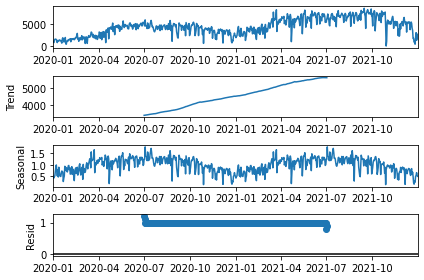

<Figure size 1512x648 with 0 Axes>

In [118]:
#Mendeki
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data_days = seasonal_decompose(df_count_all, model="multiplicative",period=365)

decompose_data_days.plot()
plt.figure(figsize=(21,9));

### Decompose seasonality and trend of the dataset

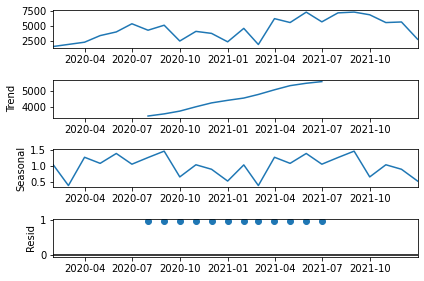

<Figure size 1512x648 with 0 Axes>

In [90]:
# Decompose seasonality and trend of the dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_count, model="multiplicative",period=12)

decompose_data.plot()
plt.figure(figsize=(21,9));

<AxesSubplot:xlabel='index'>

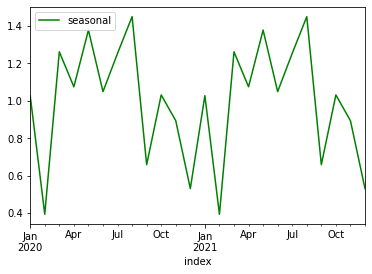

In [91]:
seasonality=decompose_data.seasonal.to_frame()
seasonality.plot(color='green')

### Check if the dataset stationary:

In [92]:
# Check if the dataset stationary:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_count, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.6731104071376196
2. P-Value :  0.8535921588199734
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 14
5. Critical Values :
	 1% :  -4.01203360058309
	 5% :  -3.1041838775510207
	 10% :  -2.6909873469387753


#### It turns out that the dataset is not stationary because the P-Value >> 0.05 after ADF test 

### Remove The Tren

In [93]:
# Remove The Tren
first_diff = df_count.diff()[1:]
first_diff

,count
index,
2020-02-29,350.0
2020-03-31,376.0
2020-04-30,1124.0
2020-05-31,623.0
2020-06-30,1388.0
2020-07-31,-1096.0
2020-08-31,849.0
2020-09-30,-2686.0
2020-10-31,1639.0


Text(0, 0.5, 'Jumlah Penyewaan')

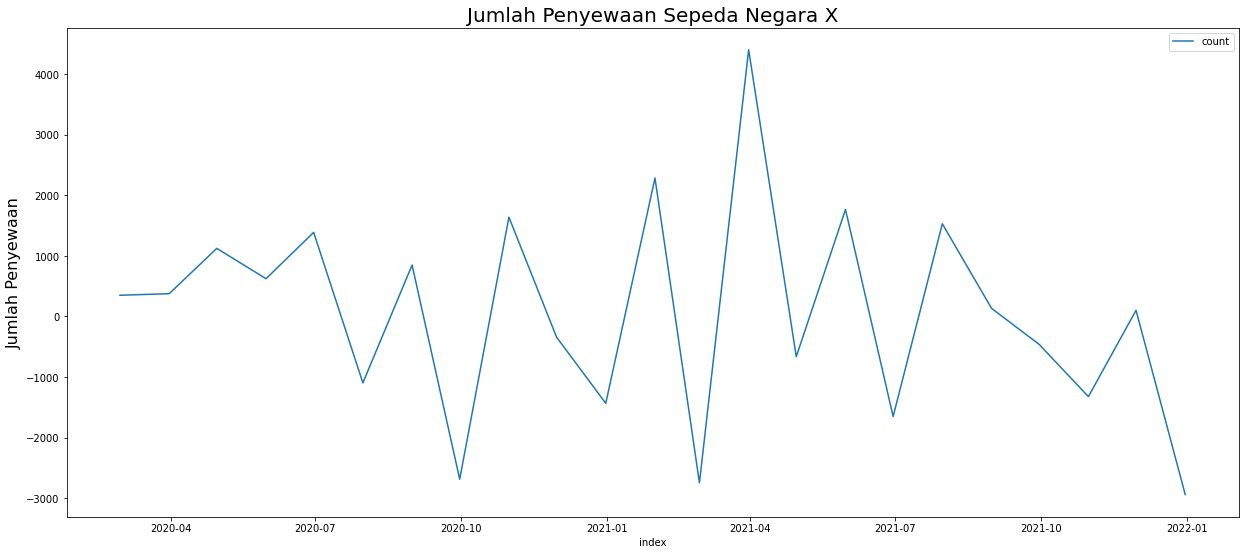

In [94]:
plt.figure(figsize=(21,9))
sns.lineplot(data=first_diff)
plt.title('Jumlah Penyewaan Sepeda Negara X',fontsize=20)
plt.ylabel('Jumlah Penyewaan',fontsize=16)

In [95]:
#Check the stationary after differencing
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(first_diff, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.107513389843583
2. P-Value :  4.017796208050733e-10
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 14
5. Critical Values :
	 1% :  -4.01203360058309
	 5% :  -3.1041838775510207
	 10% :  -2.6909873469387753


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


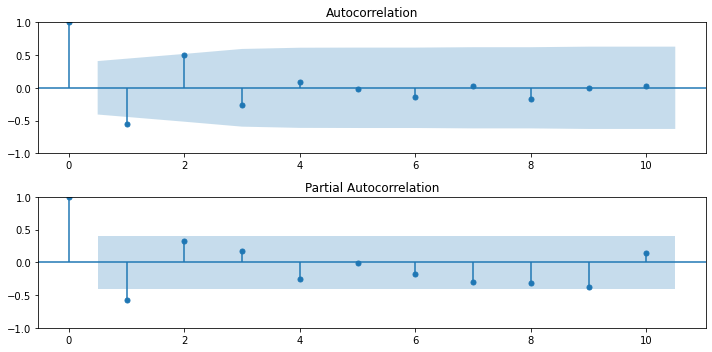

In [96]:
#Show ACF and PACF
import statsmodels.api as sm
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(first_diff, lags=10, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(first_diff, lags=10, ax=ax[1])
plt.tight_layout()
plt.show()

In [121]:
# Mencari paramater terbaik untuk model SARIMA dengan mencari AIC terkecil

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_count, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=211.737, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=212.603, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=224.867, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=213.713, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=213.389, Time=0.28 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=215.414, Time=0.26 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=210.604, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=212.600, Time=0.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=214.591, Time=0.32 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=212.505, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=210.934, Time=0.50 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -102.302
Date:                            Thu, 02 Jun 2022   AIC                            210.604
Time:                                    16:01:59   BIC                            212.059
Sample:                                         0   HQIC                           210.066
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3352.2475   1303.741      2.571      0.010     796.962    5907.534
ar.L1         -0.4989      0.509     -0.980      0.327      -1.497       0.499
sigma2      1.553e+06   9.04e+05      1.718      0.086   -2.19e+05    3.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.95   Prob(JB):                         0.82
Heteroskedasticity (H):               1.82   Skew:                            -0.18
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Hasil Forecasting Penyewaan Sepeda 2 Tahun Kedepan

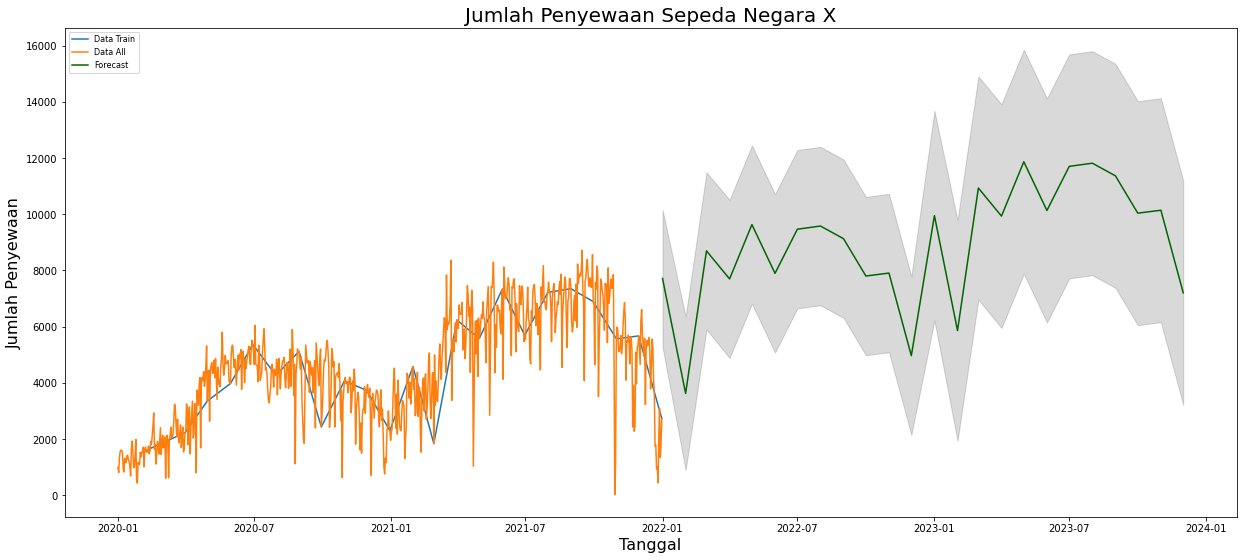

In [99]:
### Hasil Forecasting Penyewaan Sepeda 2 Tahun Kedepan
# Forecast
predictions = df_count.copy()
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(predictions.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(21,9))
plt.plot(predictions, label='Data Train')
plt.plot(df_count_all, label='Data All')
plt.plot(fitted_series, color='darkgreen',label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.title('Jumlah Penyewaan Sepeda Negara X',fontsize=20)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Jumlah Penyewaan',fontsize=16)
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Grafik Time Series Penyewaan sepeda tiap bulannya

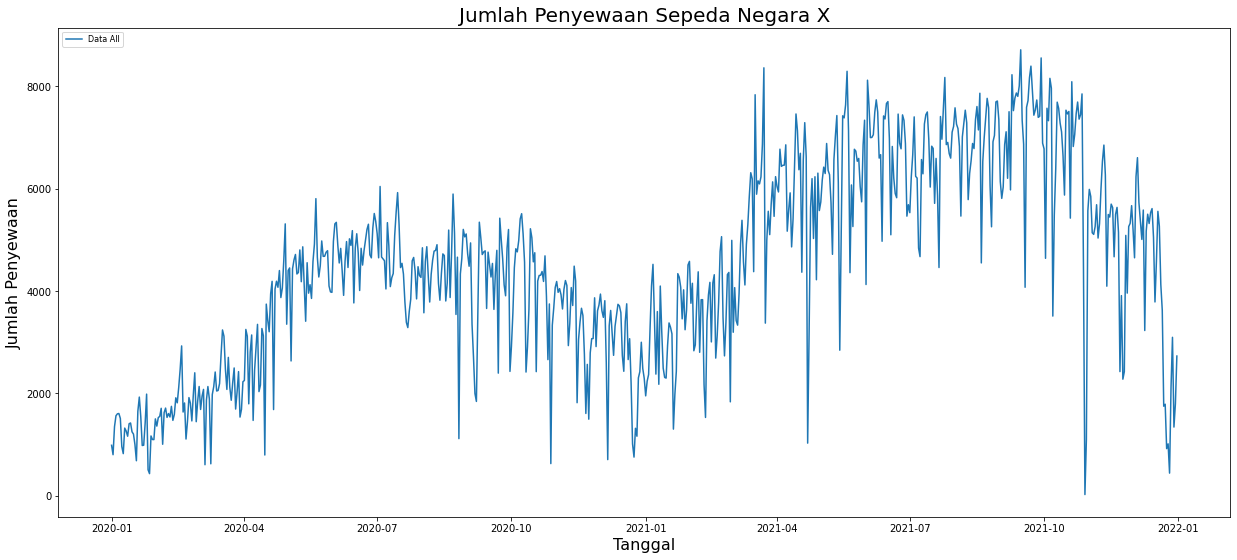

In [114]:
plt.figure(figsize=(21,9))
plt.plot(df_count_all, label='Data All')
plt.title('Jumlah Penyewaan Sepeda Negara X',fontsize=20)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Jumlah Penyewaan',fontsize=16)
plt.legend(loc='upper left', fontsize=8)
plt.show()